<a href="https://colab.research.google.com/github/geehaad/Consumer-Reviews-of-Amazon-Products/blob/main/usecase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About This Data
This is a list of over 34,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database. The dataset includes basic product information, rating, review text, and more for each product.

Note that this is a sample of a large dataset. The full dataset is available through Datafiniti.

# This is formatted as code


You can use this data to analyze Amazon’s most successful consumer electronics product launches; discover insights into consumer reviews and assist with machine learning models

# So, Let's get started
## Importing Dependencies and Data
#### Start by importing the dependencies and the data.


In [ ]:
# Import libraries 
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.stem.snowball import SnowballStemmer

In [ ]:
df = pd.read_csv("data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploratory Data Analysis(EDA)
How do we get from data to answers?
 Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results.

In [ ]:
# Get the first 5 rows of the train data
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
# The shape of the data
df.shape

(34660, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [ ]:
# Check the null values
df.isna().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [ ]:
# Number of Disaster Tweets
print("Positive rating: " +str(len(df[df["reviews.rating"]>3])))
print("Negative rating: " +str(len(df[df["reviews.rating"]<4])))

Positive rating: 32316
Negative rating: 2311


In [ ]:
# convert the null value with space
df[['reviews.text','reviews.title']] = df[['reviews.text','reviews.title']].fillna('')
# merge the review text and title 
df['text'] = df['reviews.text'] +" "+ df["reviews.title"] 

In [ ]:
df['text'].head()

0    This product so far has not disappointed. My c...
1    great for beginner or experienced person. Boug...
2    Inexpensive tablet for him to use and learn on...
3    I've had my Fire HD 8 two weeks now and I love...
4    I bought this for my grand daughter when she c...
Name: text, dtype: object

In [ ]:
df['text'].isna().sum()

0

In [ ]:
data = df[["text", "reviews.rating"]]

In [ ]:
data.isna().sum()

text               0
reviews.rating    33
dtype: int64

In [ ]:
data.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data.isna().sum()

text              0
reviews.rating    0
dtype: int64

In [ ]:
# explore some of the reviews
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
I bought this tablet because it seemed worth it for the price. However, it only lasted 6 months before the battery died and was not chargeable, regardless of troubLeshooting and what cord or outlet I used.Best Buy said they couldn't do anything but said Amazon could help me since it should be under warranty. I escalated multiple times with Amazon and they refused to help me each time. So save your $49.99 and put it towards a good product. Do Not Buy This Tablet 

RATE:
1.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I bought this new paperwhite after using the regular kindle for a long time. I am amazed by the light weight and the ease of use. The battery makes a huge difference as well. Love it!!!! Amazing Paperwhite!!! 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I bought 5 of these for the kids for Christmas Easy to set up Work perfe

In [ ]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23775
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: reviews.rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


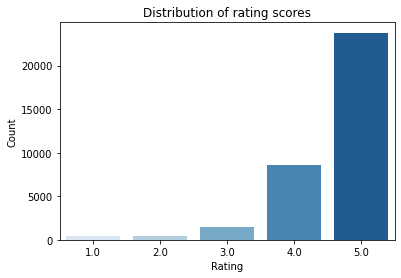

In [ ]:
# distribution of rating
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


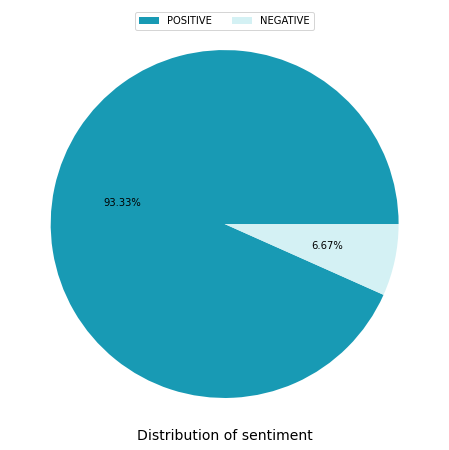

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

# Visualize most frequent words

In [ ]:
# get all used words 
all_words = pd.Series(' '.join(data['text']).split())

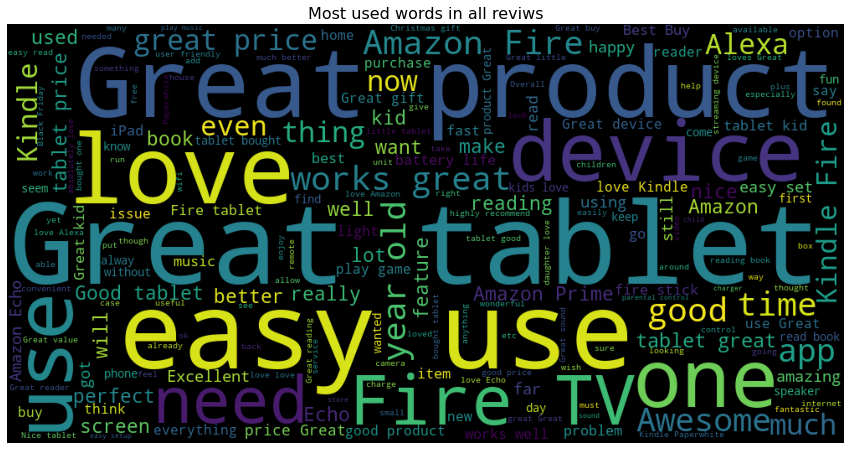

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

#Positive words

In [ ]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['text']).split())

In [ ]:
# plot word cloud
bg_color='salmon'
cmap='rainbow'
wordcloud = WordCloud(width = 1000, height = 500,background_color= bg_color, colormap=cmap).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))


<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

#Negative words

In [ ]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['text']).split())

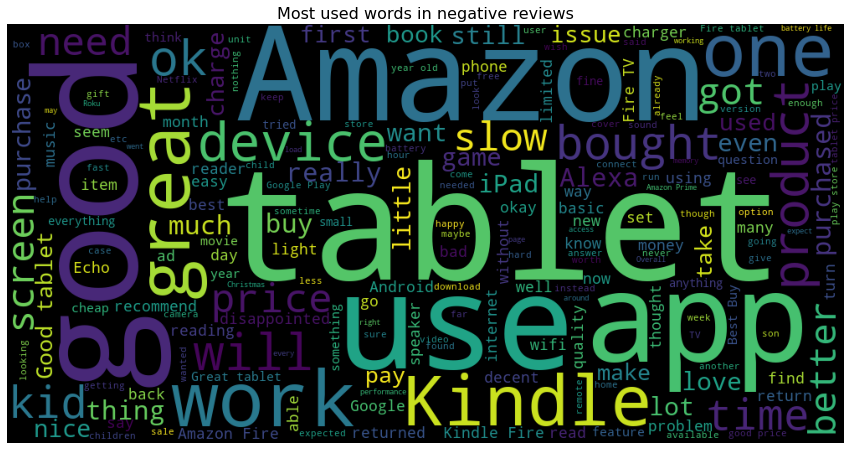

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

# Preprocessing

#1- Stemming

In [ ]:
# Perform stemming using WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")
data['text'] = [stemmer.stem(item) for item in data['text']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data['text']

0        this product so far has not disappointed. my c...
1        great for beginner or experienced person. boug...
2        inexpensive tablet for him to use and learn on...
3        i've had my fire hd 8 two weeks now and i love...
4        i bought this for my grand daughter when she c...
                               ...                        
34655    this is not appreciably faster than any other ...
34656    amazon should include this charger with the ki...
34657    love my kindle fire but i am really disappoint...
34658    i was surprised to find it did not come with a...
34659    to spite the fact that i have nothing but good...
Name: text, Length: 34627, dtype: object

# 2- Delete stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = [item for item in data['text'] if item not in stop]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data['text']

0        this product so far has not disappointed. my c...
1        great for beginner or experienced person. boug...
2        inexpensive tablet for him to use and learn on...
3        i've had my fire hd 8 two weeks now and i love...
4        i bought this for my grand daughter when she c...
                               ...                        
34655    this is not appreciably faster than any other ...
34656    amazon should include this charger with the ki...
34657    love my kindle fire but i am really disappoint...
34658    i was surprised to find it did not come with a...
34659    to spite the fact that i have nothing but good...
Name: text, Length: 34627, dtype: object

In [ ]:
# Remove single char
def notT(text):
    text = [item for item in text if len(item)>4]
    return text

data['text']= notT(data['text'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data['text']

0        this product so far has not disappointed. my c...
1        great for beginner or experienced person. boug...
2        inexpensive tablet for him to use and learn on...
3        i've had my fire hd 8 two weeks now and i love...
4        i bought this for my grand daughter when she c...
                               ...                        
34655    this is not appreciably faster than any other ...
34656    amazon should include this charger with the ki...
34657    love my kindle fire but i am really disappoint...
34658    i was surprised to find it did not come with a...
34659    to spite the fact that i have nothing but good...
Name: text, Length: 34627, dtype: object

In [ ]:
# convert text "list" to string
df['text'] = df['text'].apply(', '.join)

# Feature Engineering and Selection

## Create TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['text'])
features = vectorizer.transform(data['text'])

features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
# tf_idf.drop('50', axis=1, inplace=True)
tf_idf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,4k,50,ability,able,about,absolutely,access,account,...,wouldn,wrong,year,years,yet,you,young,your,youtube,yr
0,0.0,0.0,0.0,0.0,0.294439,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.183441,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.105363,0.0,0.0,0.119516,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.069148,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.061937,0.0,0.0,0.0,0.0


# Splitting Dataset into Train and Test Set

In [ ]:
data

,text,reviews.rating,sentiment_score,sentiment
0,this product so far has not disappointed. my c...,5.0,1,POSITIVE
1,great for beginner or experienced person. boug...,5.0,1,POSITIVE
2,inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,i've had my fire hd 8 two weeks now and i love...,4.0,1,POSITIVE
4,i bought this for my grand daughter when she c...,5.0,1,POSITIVE
...,...,...,...,...
34655,this is not appreciably faster than any other ...,3.0,0,NEGATIVE
34656,amazon should include this charger with the ki...,1.0,0,NEGATIVE
34657,love my kindle fire but i am really disappoint...,1.0,0,NEGATIVE
34658,i was surprised to find it did not come with a...,1.0,0,NEGATIVE


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(27701, 700)
Test set shape	:(6926, 700)


In [ ]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()

,10,100,4k,50,ability,able,about,absolutely,access,account,...,wrong,year,years,yet,you,young,your,youtube,yr,sentiment_score
0,0.0,0.0,0.0,0.0,0.294439,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.183441,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.000000,0.105363,0.0,0.0,0.119516,0.0,...,0.0,0.000000,0.000000,0.0,0.069148,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.200788,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


In [ ]:
yy_test = pd.DataFrame(y_test)
test_data = pd.concat([X_test, yy_test],axis=1)
test_data.head()

,10,100,4k,50,ability,able,about,absolutely,access,account,...,wrong,year,years,yet,you,young,your,youtube,yr,sentiment_score
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061937,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287481,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_data['sentiment_score'].value_counts()


1.0    25862
0.0     1839
Name: sentiment_score, dtype: int64

# Oversampling

In [ ]:
from sklearn.utils import shuffle

target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)
df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,10,100,4k,50,ability,able,about,absolutely,access,account,...,wrong,year,years,yet,you,young,your,youtube,yr,sentiment_score
15674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train_over.dropna(inplace=True)

In [ ]:
df_train_over['sentiment_score'].value_counts()

1.0    21084
0.0    20673
Name: sentiment_score, dtype: int64

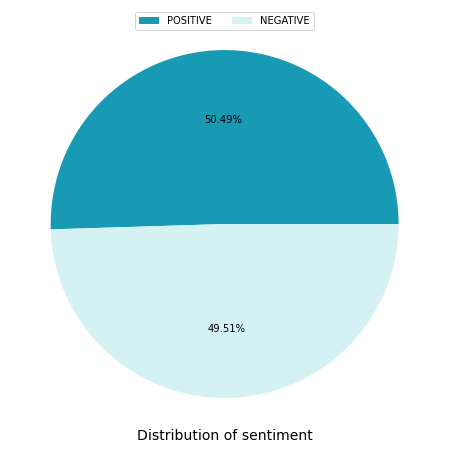

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(df_train_over['sentiment_score'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [ ]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

In [ ]:
target_count = test_data['sentiment_score'].value_counts()
negative_class = test_data[test_data['sentiment_score'] == 0]
positive_class = test_data[test_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)
df_test_over = pd.concat([positive_class, negative_over], axis=0)
df_test_over = shuffle(df_test_over)
df_test_over.head()

,10,100,4k,50,ability,able,about,absolutely,access,account,...,wrong,year,years,yet,you,young,your,youtube,yr,sentiment_score
31458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
df_test_over.dropna(inplace=True)

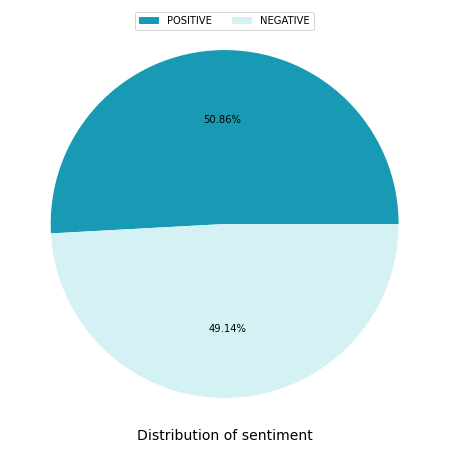

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(df_test_over['sentiment_score'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [ ]:
X_test = df_test_over.iloc[:,:-1]
y_test = df_test_over['sentiment_score']

In [ ]:
df_train_over['sentiment_score']

15674    0.0
15674    0.0
6046     1.0
9292     1.0
4266     0.0
        ... 
24927    1.0
298      0.0
3453     0.0
15077    0.0
12057    0.0
Name: sentiment_score, Length: 41757, dtype: float64

In [ ]:
y_train.shape

(41757,)

In [ ]:
X_train.shape

(41757, 700)

In [ ]:
X_test.shape

(3309, 700)

In [ ]:
y_test.shape

(3309,)

#Modeling

In [ ]:
def evaluate(y_true, y_predicted):
    acc = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    return acc, precision, recall, f1

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (8,8))

    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test', 
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix') 

##LogisticRegression

              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53      1626
         1.0       0.57      0.63      0.60      1683

    accuracy                           0.57      3309
   macro avg       0.57      0.56      0.56      3309
weighted avg       0.57      0.57      0.56      3309

AUC  0.5648721861550167


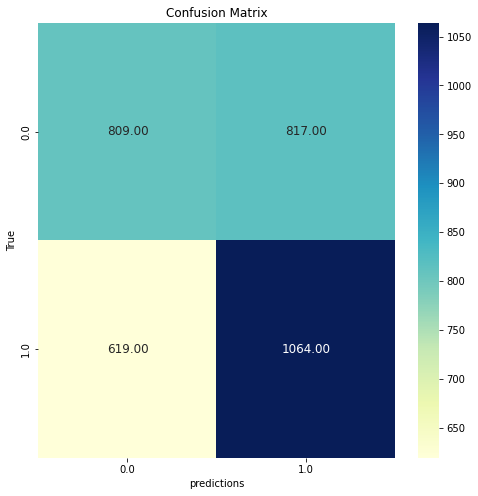

In [ ]:
modeling(LogisticRegression())

##MultinomialNB

              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59      1626
         1.0       0.61      0.63      0.62      1683

    accuracy                           0.60      3309
   macro avg       0.60      0.60      0.60      3309
weighted avg       0.60      0.60      0.60      3309

AUC  0.6027679661823356


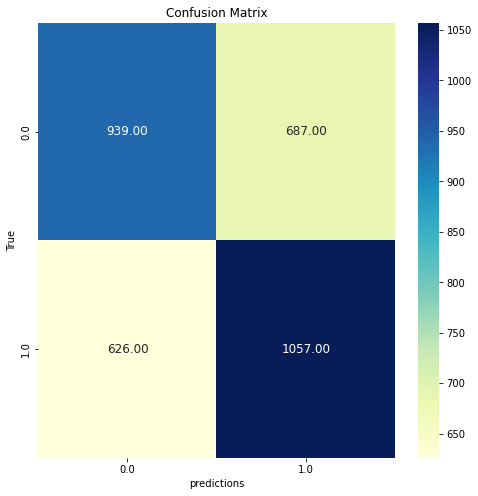

In [ ]:
modeling(MultinomialNB())

##ComplementNB

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59      1626
         1.0       0.60      0.60      0.60      1683

    accuracy                           0.60      3309
   macro avg       0.59      0.59      0.59      3309
weighted avg       0.60      0.60      0.60      3309

AUC  0.5949027939477256


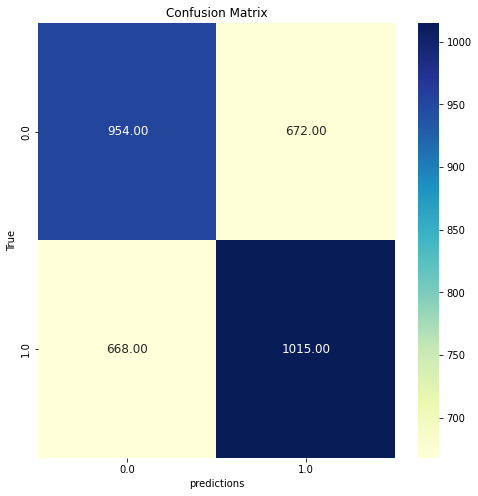

In [ ]:
modeling(ComplementNB())

#GaussianNB

              precision    recall  f1-score   support

         0.0       0.55      0.61      0.58      1626
         1.0       0.58      0.53      0.55      1683

    accuracy                           0.57      3309
   macro avg       0.57      0.57      0.57      3309
weighted avg       0.57      0.57      0.57      3309

AUC  0.5673201518111437


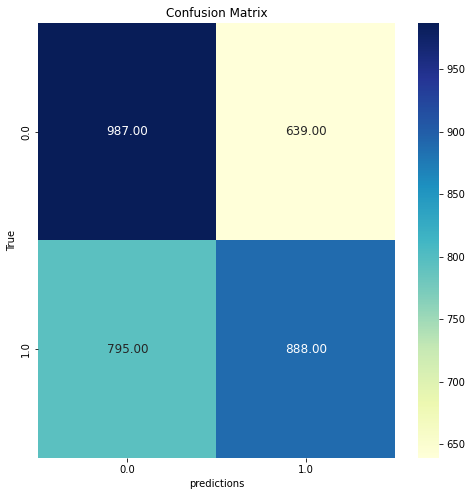

In [ ]:
from sklearn.naive_bayes import GaussianNB
modeling(GaussianNB())

##GradientBoostingClassifier

              precision    recall  f1-score   support

         0.0       0.58      0.52      0.55      1626
         1.0       0.58      0.64      0.61      1683

    accuracy                           0.58      3309
   macro avg       0.58      0.58      0.58      3309
weighted avg       0.58      0.58      0.58      3309

AUC  0.5810657037051654


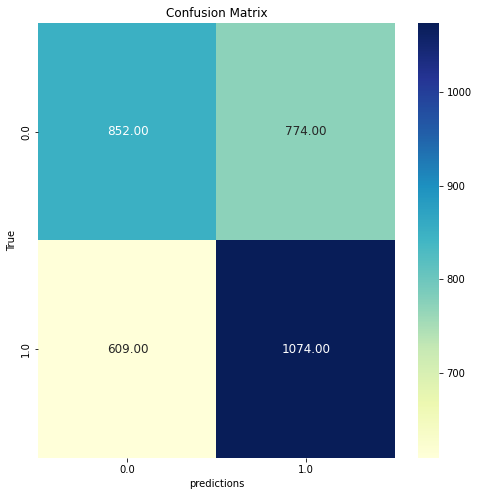

In [ ]:
modeling(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0))

## XGBoost

In [ ]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

         0.0       0.58      0.45      0.50      1626
         1.0       0.56      0.68      0.61      1683

    accuracy                           0.57      3309
   macro avg       0.57      0.56      0.56      3309
weighted avg       0.57      0.57      0.56      3309

AUC  0.564643614350582


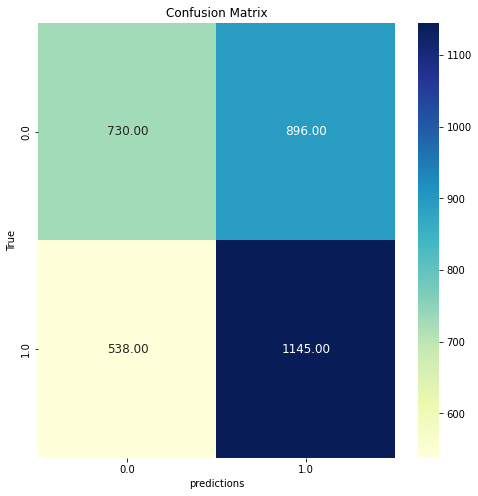

In [ ]:
modeling(XGBClassifier());

## LSTM

In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
import keras

# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          300000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 24)                3096      
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


## Model Training and Evaluation


In [ ]:
num_epochs = 5
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/5
20/20 [==============================] - 8s 217ms/step - loss: 0.6944 - accuracy: 0.4683 - val_loss: 0.6911 - val_accuracy: 0.6286
Epoch 2/5
20/20 [==============================] - 3s 172ms/step - loss: 0.6929 - accuracy: 0.5079 - val_loss: 0.6928 - val_accuracy: 0.6000
Epoch 3/5
20/20 [==============================] - 3s 172ms/step - loss: 0.6913 - accuracy: 0.5905 - val_loss: 0.6883 - val_accuracy: 0.6286
Epoch 4/5
20/20 [==============================] - 3s 173ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6901 - val_accuracy: 0.6286
Epoch 5/5
20/20 [==============================] - 3s 170ms/step - loss: 0.6617 - accuracy: 0.6921 - val_loss: 0.6789 - val_accuracy: 0.6286
